# CATBOOST

In [42]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

**DATA TRAIN**

In [43]:
file = "../Dataset/DCredit.xlsx"
credit_train = pd.read_excel(file, sheet_name="Train")
credit_train.head()

,id,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,288,1 - 200 DM,48,poor,car0,7582,100 - 500 DM,unemployed,2,4,31,none,other,1,management,1,yes,no
1,788,unknown,48,critical,car,2751,unknown,> 7 years,4,3,38,none,own,2,skilled,2,yes,no
2,409,unknown,24,good,furniture/appliances,3235,500 - 1000 DM,> 7 years,3,2,26,none,own,1,management,1,yes,no
3,881,unknown,24,good,car,7814,< 100 DM,4 - 7 years,3,3,38,none,own,1,management,1,yes,no
4,937,> 200 DM,9,good,furniture/appliances,745,< 100 DM,1 - 4 years,3,2,28,none,own,1,unskilled,1,no,yes


In [44]:
credit_train.shape

(800, 18)

In [45]:
credit_train.describe()

,id,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,492.016250,21.116250,3264.193750,2.968750,2.823750,35.672500,1.408750,1.153750
std,292.654595,12.388486,2845.376591,1.124435,1.101909,11.451929,0.578439,0.360935
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,235.750000,12.000000,1363.250000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,483.500000,18.000000,2278.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,748.250000,24.000000,3973.750000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [46]:
X_train = credit_train.iloc[:,1:17] #separamos a los Xi del Y
X_train.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1 - 200 DM,48,poor,car0,7582,100 - 500 DM,unemployed,2,4,31,none,other,1,management,1,yes
1,unknown,48,critical,car,2751,unknown,> 7 years,4,3,38,none,own,2,skilled,2,yes
2,unknown,24,good,furniture/appliances,3235,500 - 1000 DM,> 7 years,3,2,26,none,own,1,management,1,yes
3,unknown,24,good,car,7814,< 100 DM,4 - 7 years,3,3,38,none,own,1,management,1,yes
4,> 200 DM,9,good,furniture/appliances,745,< 100 DM,1 - 4 years,3,2,28,none,own,1,unskilled,1,no


LABEL ENCODER

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
lb_make = LabelEncoder()
X_train["checking_balance"] = lb_make.fit_transform(X_train["checking_balance"])
X_train["credit_history"] = lb_make.fit_transform(X_train["credit_history"])
X_train["purpose"] = lb_make.fit_transform(X_train["purpose"])
X_train["savings_balance"] = lb_make.fit_transform(X_train["savings_balance"])
X_train["employment_duration"] = lb_make.fit_transform(X_train["employment_duration"])
X_train["other_credit"] = lb_make.fit_transform(X_train["other_credit"])
X_train["housing"] = lb_make.fit_transform(X_train["housing"])
X_train["job"] = lb_make.fit_transform(X_train["job"])
X_train["phone"] = lb_make.fit_transform(X_train["phone"])

In [49]:
X_train.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,0,48,3,2,7582,0,4,2,4,31,1,0,1,0,1,1
1,3,48,0,1,2751,4,3,4,3,38,1,1,2,1,2,1
2,3,24,1,4,3235,1,3,3,2,26,1,1,1,0,1,1
3,3,24,1,1,7814,2,1,3,3,38,1,1,1,0,1,1
4,2,9,1,4,745,2,0,3,2,28,1,1,1,3,1,0


In [50]:
y_train = credit_train.default
y_train.head()

0     no
1     no
2     no
3     no
4    yes
Name: default, dtype: object

In [51]:
l=LabelEncoder()
l.fit(y_train)
l.classes_
y_train = Series(l.transform(y_train))
y_train.value_counts()

0    562
1    238
dtype: int64

In [52]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
dtype: int64

**DATA TEST**

In [53]:
credit_test = pd.read_excel(file, sheet_name="Test")
credit_test.head()

,id,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,3,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
1,10,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes
2,11,1 - 200 DM,12,good,car,1295,< 100 DM,< 1 year,3,1,25,none,rent,1,skilled,1,no,yes
3,14,< 0 DM,24,critical,car,1199,< 100 DM,> 7 years,4,4,60,none,own,2,unskilled,1,no,yes
4,27,unknown,6,perfect,furniture/appliances,426,< 100 DM,> 7 years,4,4,39,none,own,1,unskilled,1,no,no


In [54]:
X_test = credit_test.iloc[:,1:-1] # quitamos el ID y el Y, primero y último iloc https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
X_test.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no
1,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no
2,1 - 200 DM,12,good,car,1295,< 100 DM,< 1 year,3,1,25,none,rent,1,skilled,1,no
3,< 0 DM,24,critical,car,1199,< 100 DM,> 7 years,4,4,60,none,own,2,unskilled,1,no
4,unknown,6,perfect,furniture/appliances,426,< 100 DM,> 7 years,4,4,39,none,own,1,unskilled,1,no


In [55]:
lb_make = LabelEncoder()
X_test["checking_balance"] = lb_make.fit_transform(X_test["checking_balance"])
X_test["credit_history"] = lb_make.fit_transform(X_test["credit_history"])
X_test["purpose"] = lb_make.fit_transform(X_test["purpose"])
X_test["savings_balance"] = lb_make.fit_transform(X_test["savings_balance"])
X_test["employment_duration"] = lb_make.fit_transform(X_test["employment_duration"])
X_test["other_credit"] = lb_make.fit_transform(X_test["other_credit"])
X_test["housing"] = lb_make.fit_transform(X_test["housing"])
X_test["job"] = lb_make.fit_transform(X_test["job"])
X_test["phone"] = lb_make.fit_transform(X_test["phone"])

In [56]:
X_test.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0
1,0,30,0,1,5234,2,4,4,2,28,1,1,2,0,1,0
2,0,12,1,1,1295,2,2,3,1,25,1,2,1,1,1,0
3,1,24,0,1,1199,2,3,4,4,60,1,1,2,3,1,0
4,3,6,2,4,426,2,3,4,4,39,1,1,1,3,1,0


In [57]:
y_test = credit_test.default
y_test.head()

0     no
1    yes
2    yes
3    yes
4     no
Name: default, dtype: object

In [58]:
l=LabelEncoder()
l.fit(y_test)
l.classes_
y_test = Series(l.transform(y_test))
y_test.value_counts()

0    138
1     62
dtype: int64

In [59]:
y_test.head()

0    0
1    1
2    1
3    1
4    0
dtype: int64

**MODELADO CATBOOST**

In [60]:
from catboost import CatBoostClassifier

In [61]:
cb = CatBoostClassifier(
    iterations=250,
    depth=10,
    l2_leaf_reg= 9,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='AUC')
#Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll

**Particion de la data de entrenamiento en Entrenamiento y Prueba**

In [62]:
#SI SE PARTICIONA:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, y_train, train_size=0.8, random_state=1234)

C:\Users\nmelol\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [38]:
cb.fit(X_train, Y_train, cat_features=[], eval_set=(X_validation, y_validation), plot = True, verbose=False)

CatBoostError: Length of label=512 and length of data=640 is different.

In [27]:
pred_cb = cb.predict(x_validation, prediction_type='Probability')[:, 1]

In [28]:
pred_cb[1:5]

array([0.62403357, 0.53780551, 0.46148062, 0.53721311])

In [29]:
for i in range(0, len(y_validation)):
    if pred_cb[i]>=0.5:       # setting threshold to .5
        pred_cb[i]=1
    else:  
        pred_cb[i]=0

####  Accuracy, Matriz Confusion, Auc, Gini 

In [31]:
from sklearn.metrics import accuracy_score
accuracy_cb=accuracy_score(y_validation,pred_cb)
accuracy_cb

0.734375

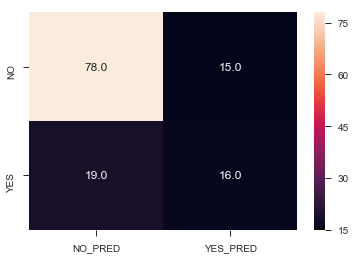

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)
conf = confusion_matrix(y_validation, pred_cb, labels = [0,1])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

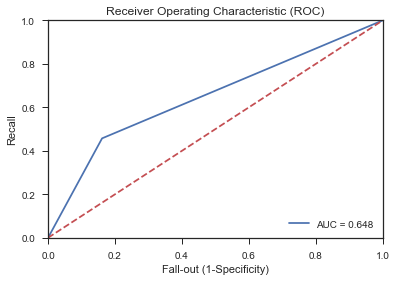

AUC score: 0.6479262672811059


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_validation, pred_cb)
roc_auc_cb = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_cb)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc_cb)


In [35]:
gini_cb=(roc_auc_cb - 0.5) * 2
gini_cb

0.29585253456221183